# Formas cuadráticas

##Objetivo

En este trabajo nuestro objetivo es estudiar un poco de teoría sobre las formas cuadráticas, un concepto esencial en el álgebra lineal y su relación con el análisis de datos, centrándonos en la norma de Mahalanobis. Para lograr esto, se verán algunas definiciones, ejemplos implementados con Python y por último algunos ejemplos de cómo utilizar  la norma de Mahalanobis para evaluar la similitud entre observaciones y detectar outliers.





## Dependencias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.spatial import distance
from sklearn.covariance import MinCovDet
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

## Un poco de teoría

A continuación veremos cómo una forma cuadrática con ciertas características nos da un producto punto y por tanto una norma. Para ello comencemos dando algunas definiciones:

**Definición 1.** Una ***forma cuadrática*** en $\mathbb{R^{n}}$ es un polinomio de grado $2$ en $n$ variables $x_{1},\ldots, x_{n}$ de la forma
$$ q(x) = x^{T}Ax = \sum_{i=1}^{n} \sum_{j=1}^{n} a_{ij}x_{i}x_{j}$$
donde $x=(x_{1},\ldots,x_{n})^{T} \in \mathbb{R^{n}}$ y $A=(a_{ij})$ es una matriz $n \times n$ real y simétrica.

**Observación:** Una forma cuadrática en $\mathbb{R^{n}}$ puede escribirse usando el producto interno canónico de $\mathbb{R^{n}}$ como $q(x)=\langle x, Ax \rangle$.

**Definición 2.** En un espacio vectorial, un ***producto punto*** es una función

$$ \langle \cdot, \cdot \rangle: V \times V → \mathbb{F} $$

donde $V$ es un espacio vectorial y $\mathbb{F}$ el cuerpo sobre el que está definido. Debe cumplir las siguientes condiciones:

1.   $\langle u, v \rangle \geq 0 $
2.    $\langle u, u \rangle =0 \Leftrightarrow u = 0 $
3.   $ \langle u, v \rangle = \overline{\langle v, u \rangle}  $
4.   $ \langle u+v,w \rangle = \langle u,w \rangle + \langle v,w \rangle$
5. $\langle \alpha u,w \rangle = \alpha \langle u,w \rangle $

para todo $u,v,w \in V$ y $\alpha \in \mathbb{F} $






**Definición 3.** Una matriz cuadrada $A$ es **simétrica** si $A=A^{T}$

**Definición 4.** Sea $A=[a_{ij}] \in M_{n \times n}(\mathbb{R^{n}})$ una matriz simétrica y sea $x=(x_{1},\ldots,x_{n}) \in \mathbb{R^{n}}$. Entonces, la matriz $A$ se dice que es ***definida positiva*** si

 $$ x^{T}Ax=\sum_{i,j}a_{ij}x_{i}x_{j}>0 $$ para todo $x \neq \vec{0}$.

Con esto pasemos a definir el siguiente producto punto en $\mathbb{R^{n}}$:

- Sean $x,y \in \mathbb{R^{n}}$.
- Sea $B$ una matriz cuadrada real, simétrica y definida positiva.

Entonces la función $\langle⋅,⋅ \rangle_{B}$ definida como

$$\langle x, y \rangle_{B}=x^{T}By$$

es un producto punto en $\mathbb{R^{n}}$.

Así note que podemos definir una forma cuadrática (definida positiva) asociada con ese producto punto, de la siguiente forma

$$q(x)=\langle x, x \rangle_{B}=x^{T}Bx$$

Además, podemos definir una norma:

$$||x||_{B}=(x^{T}Bx)^{\frac{1}{2}}$$

**Nota:** Para el caso complejo, en lugar de pedir que la matriz sea simétrica se pide que sea *hermitiana*.

## Algunos ejemplos

Los siguientes ejemplos son para practicar un poco sobre las formas cuadráticas.

**Ejemplo 1.** Diga cuál condición debe cumplirse para que la matriz

$$A = \begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1\\
0 & -1 & 2
\end{bmatrix}$$

sea definida positiva.

**Solución:**

Queremos que $x^{T}Ax>0$. Para esto, veamos que
\begin{eqnarray}
x^{T}Ax & = & \begin{bmatrix}  
x_{1} & x_{2} & x_{3}
\end{bmatrix} \begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1\\
0 & -1 & 2
\end{bmatrix} \begin{bmatrix}
x_{1}  \\
x_{2} \\
x_{3}
\end{bmatrix} \\
& = & \begin{bmatrix}  
x_{1} & x_{2} & x_{3}
\end{bmatrix} \begin{bmatrix}
2x_{1}-x_{2}  \\
-x_{1}+2x_{2}-x_{3} \\
-x_{2}+2x_{3}
\end{bmatrix}\\
& = & x_{1}(2x_{1}-x_{2})+x_{2}(-x_{1}+2x_{2}-x_{3})+x_{3}(-x_{2}+2x_{3}) \\
& = & 2x_{1}^{2}-2x_{1}x_{2}+2x_{2}^{2}-2x_{2}x_{3}+2x_{3}^{2} \\
& = & x_{1}^{2}+(x_{1}-x_{2})^{2}+(x_{2}-x_{3})^{2}+x_{3}^{2} \\
\end{eqnarray}

Por tanto, la desigualdad $x_{1}^{2}+(x_{1}-x_{2})^{2}+(x_{2}-x_{3})^{2}+x_{3}^{2}>0$ se cumplirá a menos que $x_{1}=x_{2}=x_{3}=0$.

**Ejemplo 2.** Muestre si las siguientes formas cuadráticas son definidas positivas o no:

1.  $q_{1}(x_{1},x_{2})= \begin{bmatrix}  
x_{1} & x_{2}
\end{bmatrix} \begin{bmatrix}
2 & 3  \\
3 & -1
\end{bmatrix} \begin{bmatrix}
x_{1}  \\
x_{2}
\end{bmatrix}$

2. $q_{2}(x_{1},x_{2},x_{3})= \begin{bmatrix}
x_{1} & x_{2} & x_{3}
\end{bmatrix} \begin{bmatrix}
1 & 1 & 1 \\
1 & 3 & -1\\
1 & -1 & 4
\end{bmatrix} \begin{bmatrix}
x_{1}  \\
x_{2} \\
x_{3}
\end{bmatrix}$

**Solución:** Desarrollando el producto de matrices tenemos lo siguiente

1.   $q(x_{1},x_{2})=\begin{bmatrix}  
x_{1} & x_{2}
\end{bmatrix} \begin{bmatrix}
2x_{1}+3x_{2}  \\
3x_{1}-x_{2}
\end{bmatrix} = 2x_{1}^{2}+3x_{1}x_{2}+3x_{1}x_{2}-x_{2}^{2}=2x_{1}^{2}+6x_{1}x_{2}-x_{2}^{2}$

Así observe que

$q(-2,4)=2(-2)^{2}+6(-2)(4)-4^{2}=8-48-16=-56$

Por tanto, $q_{1}$ no es definida positiva.

2. $q_{2}(x_{1},x_{2},x_{3})=\begin{bmatrix}
x_{1} & x_{2} & x_{3}
\end{bmatrix} \begin{bmatrix}
x_{1}+x_{2}+x_{3}  \\
x_{2}+3x_{2}-x_{3} \\
x_{3}-x_{2}+4x_{3}
\end{bmatrix} = x_{1}^{2}+3x_{2}^{2}+4x_{3}^{2}+2x_{1}x_{2}+2x_{1}x_{3}-2x_{2}x_{3}$

Se puede verificar que esta expresión es igual a

$q_{2}(x_{1},x_{2},x_{3})=\frac{2}{11}x_{1}^{2}+\frac{1}{4}(x_{1}-x_{2}+4x_{3})^{2}+\frac{1}{44}(5x_{1}+11x_{2})^{2}$

Por tanto, $q_{2}$ es definida positiva.


**Ejemplo 3.** Encuentre las matrices simétricas que representan las formas cuadráticas:



1.   $\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}$
2.   $\frac{x^{2}}{a^{2}}-\frac{y^{2}}{b^{2}}$
3.   $x^{2}$

**Solución:**

1.   $\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}=\begin{bmatrix}  
x/a^{2} & y/b^{2}
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix} = \begin{bmatrix}  
x & y
\end{bmatrix} \begin{bmatrix}  
1/a^{2} & 0 \\
0 & 1/b^{2}
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix}$

2.   $\frac{x^{2}}{a^{2}}-\frac{y^{2}}{b^{2}}=\begin{bmatrix}  
x/a^{2} & -y/b^{2}
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix} = \begin{bmatrix}  
x & y
\end{bmatrix} \begin{bmatrix}  
1/a^{2} & 0 \\
0 & -1/b^{2}
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix}$

3. $x^{2}=\begin{bmatrix}  
x & 0
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix} = \begin{bmatrix}  
x & y
\end{bmatrix} \begin{bmatrix}  
1 & 0 \\
0 & 0
\end{bmatrix} \begin{bmatrix}  
x \\
y
\end{bmatrix}$

Así las matrices simétricas que representan a las formas cuadráticas son
$$\begin{bmatrix}  
1/a^{2} & 0 \\
0 & 1/b^{2}
\end{bmatrix},\begin{bmatrix}  
1/a^{2} & 0 \\
0 & -1/b^{2}
\end{bmatrix}, \begin{bmatrix}  
1 & 0 \\
0 & 0
\end{bmatrix}$$
respectivamente.



## Implementación de la norma $||\cdot||_{B}$

In [ ]:
def norma_fcuad(vector:np.ndarray,matriz:np.ndarray,vectorT:np.ndarray) -> float:
  return round((np.dot(np.dot(vector, matriz), vectorT)[0][0])**(1/2),4)

# También podemos definir la métrica que genera la norma
def metrica_fcuad(vector1,matriz,vector2) -> float:
  return norma_fcuad(vector1-vector2,matriz,(vector1-vector2).T)

In [ ]:
# Ejemplo
xT = np.array([[1,2,3]])
x = xT.T
B = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

f"||{list(xT[0])} || = {norma_fcuad(xT,B,x)}"

'||[1, 2, 3] || = 3.4641'

## Algunos dibujos

Visualicemos algunos conjuntos.

1. $B_{||\cdot||_{E}}((0,0),1)=\{(x,y) \in \mathbb{R}^2:||(x,y)||_{E}=(3x^{2}-6xy+4y^{2}+2x-2y)^{\frac{1}{2}}<1\}$ con


$$E = \begin{bmatrix}
3 & -3 \\
-3 & 4 \\
\end{bmatrix}$$



<ipython-input-10-86780e249f45>:3: RuntimeWarning: invalid value encountered in sqrt
  return (3*x**2 - 6*x*y + 4*y**2 + 2*x - 2*y)**(1/2) < 1


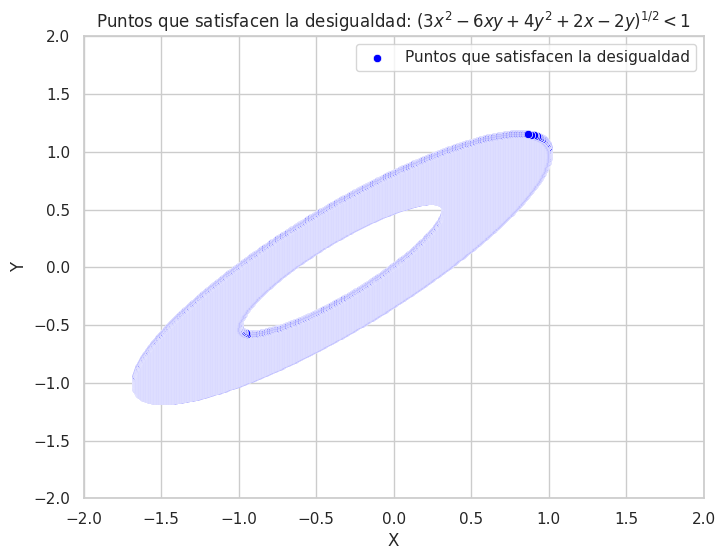

In [ ]:
# Definimos la desigualdad
def desigualdad(x, y):
    return (3*x**2 - 6*x*y + 4*y**2 + 2*x - 2*y)**(1/2) < 1

# Generamos puntos en el rango deseado
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

# Evaluamos la desigualdad en los puntos
Z = desigualdad(X, Y)

# Configuramos el estilo del gráfico
sns.set(style='whitegrid')

# Creamos el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[Z], y=Y[Z], color='blue', label='Puntos que satisfacen la desigualdad',sizes=50)

# Configuramos los ejes y las etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos que satisfacen la desigualdad: $(3x^2 - 6xy + 4y^2 + 2x - 2y)^{1/2} < 1$')

# Mostramos el gráfico
plt.legend()
plt.show()


2. $B_{||\cdot||_{H}}((0,0),1)=\{(x,y) \in \mathbb{R}^2:||(x,y)||_{H}=(x^{2}-y^{2})^{\frac{1}{2}}<1\}$ con


$$H = \begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}$$

<ipython-input-5-526e2fe48033>:3: RuntimeWarning: invalid value encountered in sqrt
  return (x**2 - y**2)**(1/2) < 1


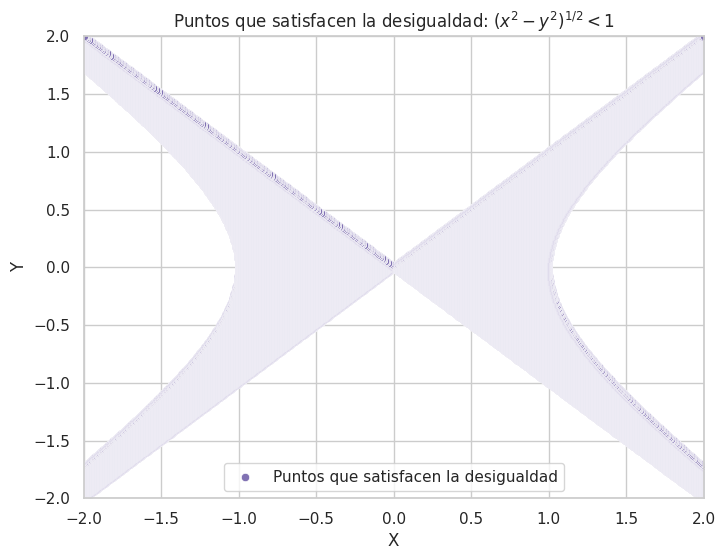

In [ ]:
# Definimos la desigualdad
def desigualdad(x, y):
    return (x**2 - y**2)**(1/2) < 1

# Generamos puntos en el rango deseado
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

# Evaluamos la desigualdad en los puntos
Z = desigualdad(X, Y)

# Configuramos el estilo del gráfico
sns.set(style='whitegrid')

# Creamos el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[Z], y=Y[Z], color='m', label='Puntos que satisfacen la desigualdad',sizes=50)

# Configuramos los ejes y  las etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos que satisfacen la desigualdad: $(x^2 - y^2)^{1/2} < 1$')

# Mostramos el gráfico
plt.legend()
plt.show()


3. $B_{||\cdot||_{P}}((0,0),1)=\{(x,y) \in \mathbb{R}^2:||(x,y)||_{P}=(x^{2})^{\frac{1}{2}}=|x|<1\}$ con


$$P = \begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}$$

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


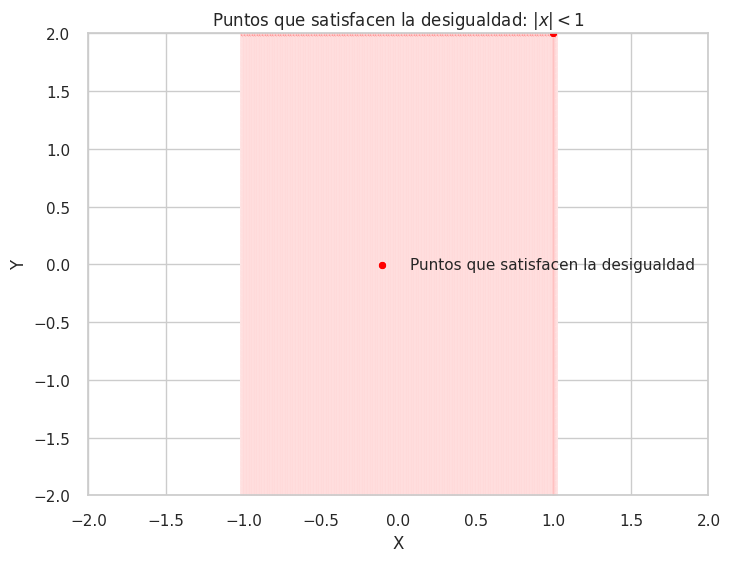

In [ ]:
# Definimos la desigualdad
def desigualdad(x, y):
    return abs(x) < 1

# Generamos puntos en el rango deseado
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

# Evaluamos la desigualdad en los puntos
Z = desigualdad(X, Y)

# Configuramos el estilo del gráfico
sns.set(style='whitegrid')

# Creamos el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[Z], y=Y[Z], color='red', label='Puntos que satisfacen la desigualdad',sizes=50)

# Configuramos los ejes y las etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos que satisfacen la desigualdad: $|x| < 1$')

# Mostramos el gráfico
plt.legend()
plt.show()

## Ejemplo relevante

**Matriz de varianza-covarianza**

Recordemos cómo se define esta matriz:

Si $X$ es un vector aleatorio dado por

$$ X = \begin{bmatrix}
X_{1}  \\
\vdots \\
X_{n}  \\
\end{bmatrix} $$

tal que $Var(X_{i})<∞$, entonces la matriz de varianza-covarianza $V(X)$ de tamaño $n \times n$ se define como

$$ V(X) = \begin{bmatrix}
Var(X_{1}) & Cov(X_{1},X_{2}) & \cdots &  Cov(X_{1},X_{n}) \\
Cov(X_{2},X_{1}) & Var(X_{2}) & \cdots &  Cov(X_{2},X_{n})  \\
\vdots & \vdots & \ddots & \vdots \\
Cov(X_{n},X_{1}) & Cov(X_{n},X_{2}) & \cdots &  Var(X_{n})  \\
\end{bmatrix} $$

Dicha matriz cumple las siguientes propiedades:

1.   Es una matriz simétrica
2.   Es semidefinida positiva

¡De modo que podemos definir un producto punto con esta matriz!

Desarrollemos un poco la expresión de este producto punto:

\begin{eqnarray}
\langle x, y \rangle_{V(X)}&=&x^{T}V(X)y \\
 & = &  \begin{bmatrix}
x_{1} & \cdots & x_{n}  \\
\end{bmatrix} V(X) \begin{bmatrix}
y_{1}  \\
\vdots \\
y_{n}  \\
\end{bmatrix} \\ \\
&=& \begin{bmatrix}
x_{1}Cov(X_{1},X_{1})+\ldots+x_{n}Cov(X_{n},X_{1}) & \cdots & x_{1}Cov(X_{1},X_{n})+\ldots+x_{n}Cov(X_{n},X_{n})  \\
\end{bmatrix} \begin{bmatrix}
y_{1}  \\
\vdots \\
y_{n}  \\
\end{bmatrix} \\ \\
& = & y_{1}[x_{1}Cov(X_{1},X_{1})+x_{2}Cov(X_{2},X_{1})+\ldots+x_{n}Cov(X_{n},X_{1})] \\
& + & y_{2}[x_{1}Cov(X_{1},X_{2})+x_{2}Cov(X_{2},X_{2})+\ldots+x_{n}Cov(X_{n},X_{2})] \\
& \vdots & \\
& + & y_{n}[x_{1}Cov(X_{1},X_{n})+x_{2}Cov(X_{2},X_{n})+\ldots+x_{n}Cov(X_{n},X_{n})] \\
& = & \sum_{i=1}^{n} y_{1}x_{i}Cov(X_{i},X_{1}) + \sum_{i=1}^{n} y_{2}x_{i}Cov(X_{i},X_{2}) + \ldots + \sum_{i=1}^{n} y_{n}x_{i}Cov(X_{i},X_{n}) \\
& = & \sum_{j=1}^{n}\left[\sum_{i=1}^{n} y_{j}x_{i}Cov(X_{i},X_{j})\right]
\end{eqnarray}

**Pregunta:** ¿Qué pasa si suponemos que las variables aleatorias son independientes?

Si las variables aleatorias son independientes implica que
$$ Cov(X_{i},X_{j}) = 0 \quad \mbox{para} \quad i \neq j$$
Por lo que
$$ V(X) = \begin{bmatrix}
Var(X_{1}) & 0 & \cdots &  0 \\
0 & Var(X_{2}) & \cdots &  0  \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots &  Var(X_{n})  \\
\end{bmatrix} $$

De esta forma al definir un producto punto la expresión que teníamos anteriormente se simplifica algo:

$$ \langle x, y \rangle_{V(X)} = \sum_{i=1}^{n} x_{i}y_{i}Cov(X_{i},X_{i}) = \sum_{i=1}^{n} x_{i}y_{i}Var(X_{i}) $$

Y la norma que produce este producto punto es:

$$ ||x||_{V(X)} = \sqrt{\langle x, x \rangle_{V(X)}} = \sqrt{\sum_{i=1}^{n} x_{i}^{2}Var(X_{i})} $$

## Relación con el análisis de datos

Ya vimos que al utilizar la matriz de varianza-covarianza, podemos definir un producto punto y, por lo tanto, una norma y una métrica. Sin embargo, existe una métrica alternativa que no emplea directamente la matriz, sino su inversa. Esta métrica resulta útil en el análisis de datos y se presenta a continuación:

**Distancia de Mahalanobis**

Sean $X_{1}, X_{2}$
variables aleatorias con la misma distribución de probabilidad, con matriz de varianza-covarianza $V(X)$. La *distancia de Mahalanobis* entre dichas variables se define como:

$$ d_{M}(x_{1},x_{2}) = \sqrt{(x_{1}-x_{2})^{T}[V(X)]^{-1}(x_{1}-x_{2})}  $$

Donde $x_{1}$, $x_{2}$ son vectores de datos (muestras) de tamaño $n$, que representan dos puntos en el espacio multidimensional

**Nota:** La distancia de Mahalanobis es una forma de determinar la similitud entre dos variables aleatorias.

### Implementación de la distancia de Mahalanobis

In [ ]:
# 1er forma
def d_Mahalanobis(X:np.ndarray,matriz_covarianza:np.ndarray,Y:np.ndarray):
  return np.sqrt((X-Y) @ np.linalg.inv(matriz_covarianza) @ (X-Y).T)

In [ ]:
# 2da forma: Usamos la función "scipy.spatial.distance.mahalanobis()"
def d_Mahalanobis2(x:list,y:list,matriz_covarianza:list):
  return scipy.spatial.distance.mahalanobis(x,y,np.linalg.inv(matriz_covarianza))

In [ ]:
# Ejemplo
X = np.array([[2,5]])
matriz_covarianza = np.array([[.5,0],[0,2]])
Y = np.array([[3,6]])

print(d_Mahalanobis(X, matriz_covarianza, Y)[0][0])
print(d_Mahalanobis2([2,5],[3,6],[[.5,0],[0,2]]))

1.5811388300841898
1.5811388300841898


**¿Para qué se usa en el análisis de datos?**

La distancia de Mahalanobis es útil para varios propósitos:

- ***Detección de valores atípicos:*** Ayuda a identificar observaciones inusuales o valores atípicos en un conjunto de datos, teniendo en cuenta la correlación entre las variables y la distribución de los datos.

- ***Agrupamiento (clustering):*** En algoritmos de agrupamiento, como el análisis de conglomerados (cluster analysis), la distancia de Mahalanobis puede ser utilizada para medir la similitud entre puntos en el espacio multidimensional, teniendo en cuenta la estructura de correlación.

- ***Clasificación y reconocimiento de patrones:*** En técnicas de clasificación y reconocimiento de patrones, la distancia de Mahalanobis puede ser utilizada como una medida de similitud entre muestras, ajustando el modelo a la estructura de covarianza presente en los datos.

- ***Análisis de componentes principales (PCA):*** En el análisis de componentes principales, que se utiliza para reducir la dimensionalidad de un conjunto de datos, la distancia de Mahalanobis puede utilizarse para transformar los datos en un nuevo espacio, teniendo en cuenta las relaciones entre las variables.

- ***Análisis discriminante:*** En el análisis discriminante, que busca encontrar combinaciones lineales de variables que maximicen la separación entre clases, la distancia de Mahalanobis puede utilizarse para definir una métrica adecuada.

Veamos algunos ejemplos:

### **Ejemplo: Detección de outliers**.
En el siguiente ejemplo se presenta una tabla de datos con calificaciones de 10 alumnos, en donde utilizaremos la distancia de Mahalanobis para detectar "outliers", es decir, datos anormales dentro de un conjunto establecido.


In [ ]:
#Importamos la tabla de excel

Ejemplo = pd.read_csv('/content/Ejemplo Estudiantes Outliers (1).csv', index_col=0)
Ejemplo

,Matematicas,Ciencias,Espanol,Historia,Deportes
Nombre,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,13.0,9.6,15.0,14.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,-3.0,7.5,-5.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7


#### Grafica de las calificaciones
<center>

<img src = "https://drive.google.com/uc?export=view&id=1Vn8dDBpSkIyehO1mAqotQno2Jx3TZOX7"
width = 80% height = 100%>

</center>



En este caso el rango establecido para las calificaciones es de 5 a 10 puntos, al tratarse de una tabla con pocos valores es fácil notar en que filas se encuentran valores que sobrepasan o estan fuera del rango. Pero como un buen ejemplo se mostrará como detectarlos.

**Observación:** Las distancias de Mahalanobis obtenidas tienen una distribución chi-cuadrada con $v$ grados de libertad. En este caso tiene una $p=1$ debido a que solo se tiene como variable la distancia de Mahalanobis.

**Distancia de Mahalanobis Robusta.** \\
Sirve para que el cálculo del vector promedio y la covarianza que se utiliza en la obtención de la distancia de Mahalanobis no se vean $n$ afectados por los outliers, se utiliza el *Determinate Minimo de la matriz de Covarianza o Minumum Covariance Dterminant* (MCD).


In [ ]:
#Convertimos el DataFrame a un array de NumPy

Ejemplo_array =  Ejemplo.to_numpy()
Ejemplo_array

array([[ 7. ,  6.5,  9.2,  8.6,  8. ],
       [ 7.5,  9.4,  7.3,  7. ,  7. ],
       [ 7.6,  9.2,  8. ,  8. ,  7.5],
       [ 5. ,  6.5,  6.5,  7. ,  9. ],
       [ 6. ,  6. ,  7.8,  8.9,  7.3],
       [13. ,  9.6, 15. , 14. ,  6.5],
       [ 6.3,  6.4,  8.2,  9. ,  7.2],
       [ 7.9, -3. ,  7.5, -5. ,  6. ],
       [ 6. ,  6. ,  6.5,  5.5,  8.7],
       [ 6.8,  7.2,  8.7,  9. ,  7. ]])

In [ ]:
#Ajustamos el estimador MCD a los datos para obtener la matriz de covarianza robusta
mcd = MinCovDet().fit(Ejemplo_array)
#Obtenemos el vector promedio de los datos que el mcd detecto excluyendo a los outliers
mcd.location_

array([6.525 , 7.15  , 7.775 , 7.875 , 7.7125])

In [ ]:
#Obtenemos la matiz de covarianza
cov_robust = mcd.covariance_
cov_robust

#Calculamos la inversa de la covarianza robusta
inv_cov_rob = np.linalg.inv(cov_robust)
inv_cov_rob

array([[ 46.10734532, -14.33377607, -38.17686192,  24.21251522,
         20.51752077],
       [-14.33377607,   5.53290247,  11.54169715,  -6.6049435 ,
         -4.77567041],
       [-38.17686192,  11.54169715,  35.66297532, -22.67321964,
        -17.06420304],
       [ 24.21251522,  -6.6049435 , -22.67321964,  16.11697254,
         13.19941284],
       [ 20.51752077,  -4.77567041, -17.06420304,  13.19941284,
         14.83478377]])

In [ ]:
# Obtenemos las distancias de Mahalanobis robustas utilizando el vector promedio y
# la inversa de la matriz de covarianza que obtuvimos

# Nota:
# Parámetros de la función mahalanobis -> (vector_fila, vector_promedio, matriz_inversa robusta)

# Creamos una lista para almacenar las distancias que se calcularán
distancias = []
# Obtenemos cada una de las filas del objeto Ejemplo_array y aplicamos la función mahalanobis
for point in Ejemplo_array:
  distancia = mahalanobis(point, mcd.location_, inv_cov_rob)
  distancias.append(distancia)
# append agrega los elementos calculados al final de la lista creada

distancias

[2.3678841015862764,
 2.26274039514452,
 2.4143592727927685,
 2.635623030695266,
 2.105193030270907,
 18.997746239867116,
 1.3300261675087777,
 37.78417337102941,
 2.533708854624747,
 1.9690107837747672]

Las distancias más grandes correspondientes a los individuos 6 y 8 son mucho más grandes que las calculadas en los demás casos por lo cual se pueden diferenciar más fácilmente.

Calculamos la probabilidad de que cada una de las distancias pertenezca a la distribución chi cuadrada:

In [ ]:
# Calculamos el complemento de la probabilidad

p = 1 - chi2.cdf(distancias, 1 ) #Con un grado de libertad
print(p)

print("\n")
# Establecemos el nivel del significancia
outliers_rob = p<0.05
print(outliers_rob)


[1.23854823e-01 1.32519375e-01 1.20227153e-01 1.04491064e-01
 1.46799817e-01 1.30872944e-05 2.48800563e-01 7.90202570e-10
 1.11438009e-01 1.60552901e-01]


[False False False False False  True False  True False False]


In [ ]:
# Ubicamos los indices en donde se ecuentran  los outliers
indices_rob =np.where(outliers_rob)[0]
indices_rob

array([5, 7])

In [ ]:
# Obtenemos información de los outliers
individuos_rob = Ejemplo.iloc[indices_rob]
individuos_rob

,Matematicas,Ciencias,Espanol,Historia,Deportes
Nombre,,,,,
Ana,13.0,9.6,15.0,14.0,6.5
Jose,7.9,-3.0,7.5,-5.0,6.0


El resultado final con el código realizado, muestra las filas con los nombres de los estudiantes y sus respectivas calificaciones con "outliers", es decir, calificaciones que están fuera del rango razonable establecido y que posiblemente fueron llenadas de esta manera erróneamente por tener calificaciones negativas o mayores a 10 y tendrán que ser corregidas.

### **Ejemplo: Distancias entre muestras de cráneos egipcios**

Para este ejemplo usaremos unos datos que vienen en el libro "*Multivariate statistical methods*" de Bryan F.J. Manly, los cuales son mediciones realizadas en cráneos masculinos del área de Tebas en Egipto. Hay cinco muestras de 30 cráneos cada una, correspondientes a los siguientes periodos:

1. Periodo predinástico temprano (circa 4000 a.C.)
2. Periodo predinástico tardío (circa 3300 a.C.)
3. Dinastías 12 y 13 (circa 1850 a.C.)
4. Periodo Ptolemaico (circa 200 a.C.)
5. Periodo Romano (circa 150 d.C.)

Cuatro mediciones están disponibles para cada cráneo.

In [ ]:
# Leemos los datos correspondientes a cada muestra
muestra1 = pd.read_excel("egyptian_skulls.xlsx",sheet_name="muestra1")
muestra1=muestra1[["x1","x2","x3","x4"]]

muestra2 = pd.read_excel("egyptian_skulls.xlsx",sheet_name="muestra2")
muestra2=muestra2[["x1","x2","x3","x4"]]

muestra3 = pd.read_excel("egyptian_skulls.xlsx",sheet_name="muestra3")
muestra3=muestra3[["x1","x2","x3","x4"]]

muestra4 = pd.read_excel("egyptian_skulls.xlsx",sheet_name="muestra4")
muestra4=muestra4[["x1","x2","x3","x4"]]

muestra5 = pd.read_excel("egyptian_skulls.xlsx",sheet_name="muestra5")
muestra5=muestra5[["x1","x2","x3","x4"]]

In [ ]:
# Obtenemos la matriz de covarianza para cada muestra
cov_muestra1 = np.round(muestra1.cov().values,decimals=2)
cov_muestra2 = np.round(muestra2.cov().values,decimals=2)
cov_muestra3 = np.round(muestra3.cov().values,decimals=2)
cov_muestra4 = np.round(muestra4.cov().values,decimals=2)
cov_muestra5 = np.round(muestra5.cov().values,decimals=2)

Teniendo estas matrices obtendremos la ***matriz de covarianza combinada***, ya que se usa particularmente en problemas de clasificación o discriminación, donde se deben comparar o clasificar diferentes grupos o categorías de datos.

Dicha matriz se define como

$$ C = \sum_{i=1}^{m}\frac{n_{i}-1}{n-m}C_{i}$$

donde

- $n_{i}$ es el tamaño de la $i-$ésima muestra.

- $C_{i}$ es la matriz de covarianza de la $i-$ésima muestra.

- $n=\sum n_{i}$ es el número total de observaciones.

- $m$ es el número de muestras.



In [ ]:
# Calculamos la matriz de covarianza combinada
# Aquí n = 20, m = 5 y n_i = 4 (para todo i)
mcov_combinada = (3/15)*(cov_muestra1+cov_muestra2+cov_muestra3+cov_muestra4+cov_muestra5)

In [ ]:
# De nuestros datos leemos los vectores de medias de cada muestra
vec_medias = pd.read_excel("egyptian_skulls.xlsx",sheet_name="vec_medias")
vec_medias=vec_medias[["x1","x2","x3","x4"]].values

In [ ]:
# Vector de medias de cada muestra
# Los convertimos a un array de tamaño 1x4
vec_medias_m1=vec_medias[0].reshape(1,4)
vec_medias_m2=vec_medias[1].reshape(1,4)
vec_medias_m3=vec_medias[2].reshape(1,4)
vec_medias_m4=vec_medias[3].reshape(1,4)
vec_medias_m5=vec_medias[4].reshape(1,4)

dif_medias_m1_m2 = vec_medias_m1-vec_medias_m2
dif_medias_m1_m3 = vec_medias_m1-vec_medias_m3
dif_medias_m1_m4 = vec_medias_m1-vec_medias_m4
dif_medias_m1_m5 = vec_medias_m1-vec_medias_m5

dif_medias_m2_m3 = vec_medias_m2-vec_medias_m3
dif_medias_m2_m4 = vec_medias_m2-vec_medias_m4
dif_medias_m2_m5 = vec_medias_m2-vec_medias_m5

dif_medias_m3_m4 = vec_medias_m3-vec_medias_m4
dif_medias_m3_m5 = vec_medias_m3-vec_medias_m5

dif_medias_m4_m5 = vec_medias_m4-vec_medias_m5

In [ ]:
# Calculamos la distancia de Mahalanobis (al cuadrado) entre los vectores de medias de cada muestra
result_1 = np.round(dif_medias_m1_m2 @ np.linalg.inv(mcov_combinada) @ dif_medias_m1_m2.T, decimals=3)
result_2 = np.round(dif_medias_m1_m3 @ np.linalg.inv(mcov_combinada) @ dif_medias_m1_m3.T, decimals=3)
result_3 = np.round(dif_medias_m1_m4 @ np.linalg.inv(mcov_combinada) @ dif_medias_m1_m4.T, decimals=3)
result_4 = np.round(dif_medias_m1_m5 @ np.linalg.inv(mcov_combinada) @ dif_medias_m1_m5.T, decimals=3)
result_5 = np.round(dif_medias_m2_m3 @ np.linalg.inv(mcov_combinada) @ dif_medias_m2_m3.T, decimals=3)
result_6 = np.round(dif_medias_m2_m4 @ np.linalg.inv(mcov_combinada) @ dif_medias_m2_m4.T, decimals=3)
result_7 = np.round(dif_medias_m2_m5 @ np.linalg.inv(mcov_combinada) @ dif_medias_m2_m5.T, decimals=3)
result_8 = np.round(dif_medias_m3_m4 @ np.linalg.inv(mcov_combinada) @ dif_medias_m3_m4.T, decimals=3)
result_9 = np.round(dif_medias_m3_m5 @ np.linalg.inv(mcov_combinada) @ dif_medias_m3_m5.T, decimals=3)
result_10 = np.round(dif_medias_m4_m5 @ np.linalg.inv(mcov_combinada) @ dif_medias_m4_m5.T, decimals=3)

In [ ]:
# Visualizamos las distancias entre cada muestra en un dataframe
m_distancias = {
    'Muestra': ['Periodo predinástico temprano', 'Periodo predinástico tardío', 'Dinastías 12 y 13', 'Periodo Ptolemaico','Periodo Romano'],
    'Periodo predinástico temprano': ['-', result_1[0][0], result_2[0][0],result_3[0][0],result_4[0][0]],
    'Periodo predinástico tardío': ['-', '-', result_5[0][0], result_6[0][0],result_7[0][0]],
    'Dinastías 12 y 13': ['-', '-', '-', result_8[0][0],result_9[0][0]],
    'Periodo Ptolemaico': ['-', '-', '-', '-',result_10[0][0]],
    'Periodo Romano': ['-', '-', '-', '-','-']
}

m_distancias_df = pd.DataFrame(m_distancias)

# Esto es para establecer la columna 'Muestra' como índice
m_distancias_df .set_index('Muestra', inplace=True)

m_distancias_df

,Periodo predinástico temprano,Periodo predinástico tardío,Dinastías 12 y 13,Periodo Ptolemaico,Periodo Romano
Muestra,,,,,
Periodo predinástico temprano,-,-,-,-,-
Periodo predinástico tardío,0.091,-,-,-,-
Dinastías 12 y 13,0.903,0.729,-,-,-
Periodo Ptolemaico,1.881,1.594,0.443,-,-
Periodo Romano,2.697,2.176,0.911,0.219,-


**Observación:**

Cada valor en el dataframe representa la distancia de Mahalanobis al cuadrado entre dos periodos específicos.

Estos resultados nos permiten comparar las similitudes o diferencias en las mediciones de cráneos entre los diferentes periodos de la muestra. Valores más pequeños indican mayor similitud, mientras que valores más grandes indican mayor diferencia entre los periodos.

Entonces vemos que existe cierta diferencia entre las cinco muestras, que como se menciona en el libro de Bryan F.J. Manly, el factor más importante de esto pudo ser la migración de otras razas a la región.


## **Referencias**

1. Kwak, J. H., & Hong, S. (2004). *Linear Algebra* (2nd ed). Birkhauser Boston.

2. Manly, B. F. J., & Navarro, A. J. A. (2017). *Multivariate Statistical Methods* (4th ed). Chapman and Hall/CRC.

3.  Chavez, R (2023). Detección de Outliers Multivariante con la Distancia de Mahalanobis y Mahalanobis Robusta en Python .Rocio Chavez Ciencia de Datos. Sitio web: https://www.youtube.com/watch?v=RbwnAUNu-gg&t=459s
